<a href="https://colab.research.google.com/github/avaowitt/NEURO/blob/main/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>.

4. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

5. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

6. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

7. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

8. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

9. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential?

10. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

11. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

12. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>.

13. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>.

14. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

15. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

16. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test.

17. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

18. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

19. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




## Ava Witt

*Intro to Neural Data Analysis*

**3.8.24**

In [3]:
# import modules

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [4]:
# import data

patch_seq = pd.read_csv('https://raw.githubusercontent.com/hallockh/neur_265/main/data/patch_seq_expanded.csv ')

Text(0, 0.5, 'Value Counts')

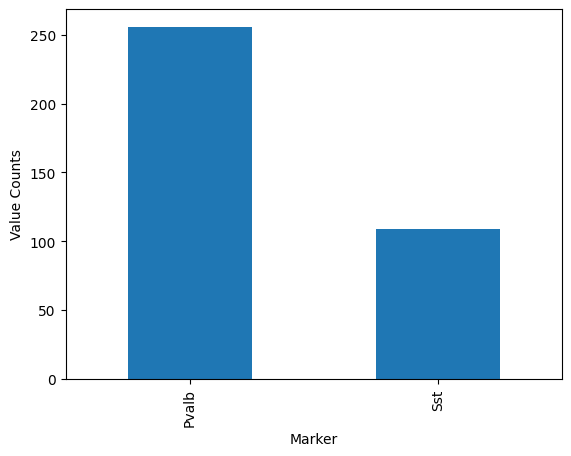

In [5]:
# plot patch_seq bar graph

marker_counts = patch_seq['Marker'].value_counts()
marker_counts.plot(kind = 'bar')
plt.xlabel('Marker')
plt.ylabel('Value Counts')

<Axes: ylabel='Marker'>

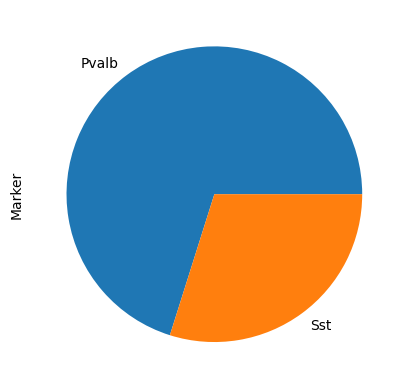

In [6]:
# plot patch_seq pie chart

marker_counts.plot(kind = 'pie')

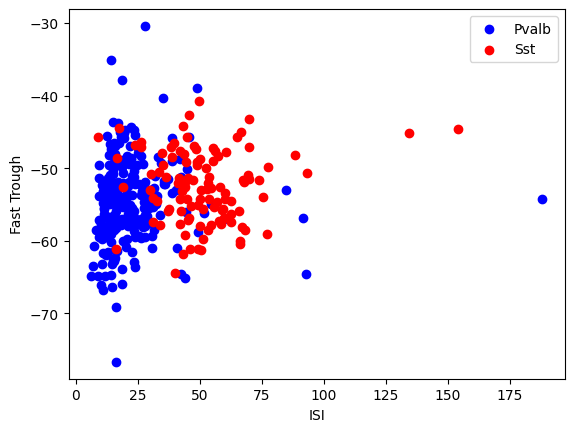

In [16]:
# graph of isi vs fast trough (used chatgpt to help here, it all makes sense)

for neuron_type, group in patch_seq.groupby('Marker'):
    x = group['ISI']
    y = group['Fast_Trough']

    if neuron_type == 'Sst':
        plt.scatter(x, y, color='red', label='Sst')
    elif neuron_type == 'Pvalb':
        plt.scatter(x, y, color='blue', label='Pvalb')


plt.legend()
plt.xlabel('ISI')
plt.ylabel('Fast Trough')

plt.show()

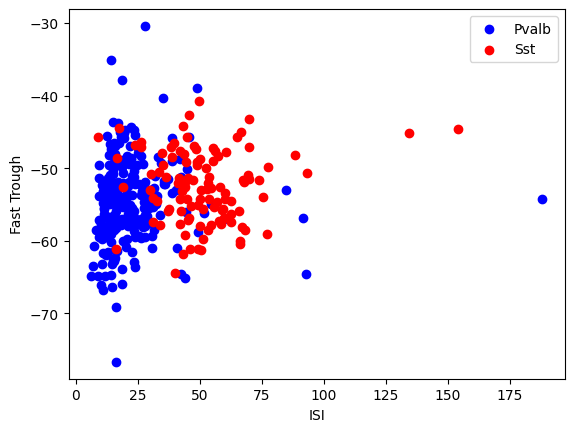

In [18]:
# create a function of the previous loop

def patchScatter():
  for neuron_type, group in patch_seq.groupby('Marker'):
    x = group['ISI']
    y = group['Fast_Trough']

    if neuron_type == 'Sst':
        plt.scatter(x, y, color='red', label='Sst')
    elif neuron_type == 'Pvalb':
        plt.scatter(x, y, color='blue', label='Pvalb')

  plt.legend()
  plt.xlabel('ISI')
  plt.ylabel('Fast Trough')

  plt.show()

patchScatter()

In [10]:
# mean, stdv, and range of Sst and Pvalb neurons

patch_seq.groupby('Marker')['Fast_Trough'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


#### **Describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential?**

The difference in the mean shows that Pvalb neurons have a lower fast trough than Sst neurons. They have a stronger tendency to reach a more negative value.


In [11]:
# find the skew of fast trough

patch_seq.groupby('Marker')['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

#### **Interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.**

Both Pvalb and Sst neurons show a normal distribution. This shows that the mean is an accurate representation of the data!


In [12]:
# find the skew of ISI

patch_seq.groupby('Marker')['ISI'].skew()

Marker
Pvalb    5.596386
Sst      1.857850
Name: ISI, dtype: float64

#### **Interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.**

Both of these distributions are skewed to the right. Pvalb is skewed to a greater extreme. The mean of these distributions would not be an accurate measure of the data. The median should be used instead.

In [14]:
# t-test of fast trough (recieved error that the nan filter used in class -- numpy -- was not compatible with pandas, below is pandas alternative)

sst_neurons = patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']

sst_neurons = sst_neurons.dropna(subset=['ISI', 'Fast_Trough'])
pvalb_neurons = pvalb_neurons.dropna(subset=['ISI', 'Fast_Trough'])

stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])

TtestResult(statistic=3.0549203198355124, pvalue=0.0024219133898888603, df=354.0)

#### **Describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?**

WOOHOO! There is significant difference present! This means that the undershoot voltage is different between the two types of neurons. This was expected, but not confirmed, through understanding the differences between the neurons. This was shown in the different means. However, differences between means does not always suggest significance. In this case, the t-test can be used as evidence to support that these two neurons perform action potentials differently, specifically the negative value of their undershoot.

In [15]:
# t-test of ISI

stats.ttest_ind(sst_neurons['ISI'], pvalb_neurons['ISI'])

TtestResult(statistic=14.643966775010774, pvalue=2.694292788633572e-38, df=354.0)

#### **Describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?**

Womp womp...there is no significant difference presence. The time between action potentials (ISI) has shown to be no different between the types of neurons. This could have been predicted by the skew, given that neither of the neurons has normal distributions.